## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 22s 0us/step


In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

#sgd = keras.SGD.Adam(lr=0.001)
#sgd = optimizers.SGD(lr=0.001)
#model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=SGD)

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',  metrics=["accuracy"],optimizer=sgd)

W0715 15:28:23.565065 140714370119488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_26 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W0715 15:28:34.861275 140714370119488 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0715 15:28:34.902713 140714370119488 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.8673 - acc: 0.3314 - val_loss: 1.7355 - val_acc: 0.3915
Epoch 2/500
50000/50000 [==============================] - 6s 122us/step - loss: 1.6579 - acc: 0.4131 - val_loss: 1.6032 - val_acc: 0.4360
Epoch 3/500
50000/50000 [==============================] - 6s 123us/step - loss: 1.5630 - acc: 0.4465 - val_loss: 1.5788 - val_acc: 0.4338
Epoch 4/500
50000/50000 [==============================] - 6s 127us/step - loss: 1.5013 - acc: 0.4664 - val_loss: 1.6853 - val_acc: 0.3970
Epoch 5/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.4520 - acc: 0.4849 - val_loss: 1.6461 - val_acc: 0.3999
Epoch 6/500
50000/50000 [==============================] - 6s 124us/step - loss: 1.4099 - acc: 0.5017 - val_loss: 1.5086 - val_acc: 0.4656
Epoch 7/500
50000/50000 [==============================] - 7s 131us/step - loss: 1.3676 - acc: 0.5162 - val_loss: 1.

50000/50000 [==============================] - 6s 117us/step - loss: 0.3105 - acc: 0.8919 - val_loss: 2.6152 - val_acc: 0.4935
Epoch 60/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.3192 - acc: 0.8866 - val_loss: 2.4618 - val_acc: 0.5140
Epoch 61/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.2905 - acc: 0.8967 - val_loss: 2.2211 - val_acc: 0.5349
Epoch 62/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.2775 - acc: 0.9028 - val_loss: 2.4543 - val_acc: 0.5216
Epoch 63/500
50000/50000 [==============================] - 6s 124us/step - loss: 0.2605 - acc: 0.9086 - val_loss: 2.4738 - val_acc: 0.5247
Epoch 64/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.2641 - acc: 0.9074 - val_loss: 2.5284 - val_acc: 0.5137
Epoch 65/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.2517 - acc: 0.9117 - val_loss: 2.3523 - val_acc: 0.5332
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 5s 90us/step - loss: 0.1095 - acc: 0.9612 - val_loss: 3.6773 - val_acc: 0.5128
Epoch 118/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.0901 - acc: 0.9682 - val_loss: 3.5696 - val_acc: 0.5215
Epoch 119/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0821 - acc: 0.9718 - val_loss: 3.4992 - val_acc: 0.5365
Epoch 120/500
50000/50000 [==============================] - 4s 89us/step - loss: 0.0688 - acc: 0.9768 - val_loss: 3.6595 - val_acc: 0.5334
Epoch 121/500
50000/50000 [==============================] - 5s 90us/step - loss: 0.1028 - acc: 0.9628 - val_loss: 3.5456 - val_acc: 0.5320
Epoch 122/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.1009 - acc: 0.9638 - val_loss: 3.5878 - val_acc: 0.5306
Epoch 123/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0865 - acc: 0.9701 - val_loss: 3.6125 - val_acc: 0.5181
Epoch 124/500
50000/50000 [=======

50000/50000 [==============================] - 6s 117us/step - loss: 0.0473 - acc: 0.9837 - val_loss: 3.9648 - val_acc: 0.5427
Epoch 176/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0329 - acc: 0.9889 - val_loss: 3.9935 - val_acc: 0.5401
Epoch 177/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0429 - acc: 0.9853 - val_loss: 4.0554 - val_acc: 0.5372
Epoch 178/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0252 - acc: 0.9915 - val_loss: 3.9755 - val_acc: 0.5429
Epoch 179/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0129 - acc: 0.9963 - val_loss: 3.9864 - val_acc: 0.5487
Epoch 180/500
50000/50000 [==============================] - 5s 94us/step - loss: 0.0088 - acc: 0.9976 - val_loss: 4.0222 - val_acc: 0.5441
Epoch 181/500
50000/50000 [==============================] - 5s 100us/step - loss: 0.0055 - acc: 0.9987 - val_loss: 3.9651 - val_acc: 0.5488
Epoch 182/500
50000/50000 [=

50000/50000 [==============================] - 4s 89us/step - loss: 1.6336e-04 - acc: 1.0000 - val_loss: 4.1414 - val_acc: 0.5556
Epoch 233/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.6269e-04 - acc: 1.0000 - val_loss: 4.1432 - val_acc: 0.5553
Epoch 234/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.6176e-04 - acc: 1.0000 - val_loss: 4.1444 - val_acc: 0.5556
Epoch 235/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.5852e-04 - acc: 1.0000 - val_loss: 4.1465 - val_acc: 0.5552
Epoch 236/500
50000/50000 [==============================] - 4s 89us/step - loss: 1.5571e-04 - acc: 1.0000 - val_loss: 4.1490 - val_acc: 0.5560
Epoch 237/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.5410e-04 - acc: 1.0000 - val_loss: 4.1494 - val_acc: 0.5559
Epoch 238/500
50000/50000 [==============================] - 5s 90us/step - loss: 1.5573e-04 - acc: 1.0000 - val_loss: 4.1512 - val_acc: 0.5561
Epoch 

Epoch 289/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.0528e-04 - acc: 1.0000 - val_loss: 4.2036 - val_acc: 0.5553
Epoch 290/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.0459e-04 - acc: 1.0000 - val_loss: 4.2041 - val_acc: 0.5562
Epoch 291/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0409e-04 - acc: 1.0000 - val_loss: 4.2049 - val_acc: 0.5559
Epoch 292/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0331e-04 - acc: 1.0000 - val_loss: 4.2054 - val_acc: 0.5560
Epoch 293/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.0279e-04 - acc: 1.0000 - val_loss: 4.2064 - val_acc: 0.5569
Epoch 294/500
50000/50000 [==============================] - 5s 93us/step - loss: 1.0238e-04 - acc: 1.0000 - val_loss: 4.2071 - val_acc: 0.5554
Epoch 295/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.0185e-04 - acc: 1.0000 - val_loss: 4.2079 - val_acc:

Epoch 346/500
50000/50000 [==============================] - 4s 90us/step - loss: 7.9735e-05 - acc: 1.0000 - val_loss: 4.2407 - val_acc: 0.5565
Epoch 347/500
50000/50000 [==============================] - 5s 93us/step - loss: 7.9453e-05 - acc: 1.0000 - val_loss: 4.2420 - val_acc: 0.5560
Epoch 348/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.9199e-05 - acc: 1.0000 - val_loss: 4.2421 - val_acc: 0.5564
Epoch 349/500
50000/50000 [==============================] - 4s 89us/step - loss: 7.8840e-05 - acc: 1.0000 - val_loss: 4.2426 - val_acc: 0.5560
Epoch 350/500
50000/50000 [==============================] - 5s 90us/step - loss: 7.8343e-05 - acc: 1.0000 - val_loss: 4.2433 - val_acc: 0.5563
Epoch 351/500
50000/50000 [==============================] - 5s 93us/step - loss: 7.8327e-05 - acc: 1.0000 - val_loss: 4.2439 - val_acc: 0.5569
Epoch 352/500
50000/50000 [==============================] - 4s 90us/step - loss: 7.8096e-05 - acc: 1.0000 - val_loss: 4.2442 - val_acc:

Epoch 403/500
50000/50000 [==============================] - 4s 88us/step - loss: 6.5111e-05 - acc: 1.0000 - val_loss: 4.2700 - val_acc: 0.5570
Epoch 404/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.4809e-05 - acc: 1.0000 - val_loss: 4.2700 - val_acc: 0.5569
Epoch 405/500
50000/50000 [==============================] - 4s 89us/step - loss: 6.4699e-05 - acc: 1.0000 - val_loss: 4.2706 - val_acc: 0.5568
Epoch 406/500
50000/50000 [==============================] - 4s 90us/step - loss: 6.4228e-05 - acc: 1.0000 - val_loss: 4.2718 - val_acc: 0.5570
Epoch 407/500
50000/50000 [==============================] - 4s 90us/step - loss: 6.4100e-05 - acc: 1.0000 - val_loss: 4.2722 - val_acc: 0.5571
Epoch 408/500
50000/50000 [==============================] - 5s 92us/step - loss: 6.3931e-05 - acc: 1.0000 - val_loss: 4.2724 - val_acc: 0.5569
Epoch 409/500
50000/50000 [==============================] - 4s 88us/step - loss: 6.3819e-05 - acc: 1.0000 - val_loss: 4.2725 - val_acc:

Epoch 460/500
50000/50000 [==============================] - 6s 128us/step - loss: 5.5132e-05 - acc: 1.0000 - val_loss: 4.2933 - val_acc: 0.5566
Epoch 461/500
50000/50000 [==============================] - 6s 119us/step - loss: 5.4980e-05 - acc: 1.0000 - val_loss: 4.2929 - val_acc: 0.5565
Epoch 462/500
50000/50000 [==============================] - 5s 108us/step - loss: 5.4888e-05 - acc: 1.0000 - val_loss: 4.2933 - val_acc: 0.5563
Epoch 463/500
50000/50000 [==============================] - 6s 112us/step - loss: 5.4654e-05 - acc: 1.0000 - val_loss: 4.2940 - val_acc: 0.5566
Epoch 464/500
50000/50000 [==============================] - 5s 108us/step - loss: 5.4507e-05 - acc: 1.0000 - val_loss: 4.2941 - val_acc: 0.5567
Epoch 465/500
50000/50000 [==============================] - 5s 108us/step - loss: 5.4386e-05 - acc: 1.0000 - val_loss: 4.2944 - val_acc: 0.5566
Epoch 466/500
50000/50000 [==============================] - 5s 109us/step - loss: 5.4219e-05 - acc: 1.0000 - val_loss: 4.2951 - v

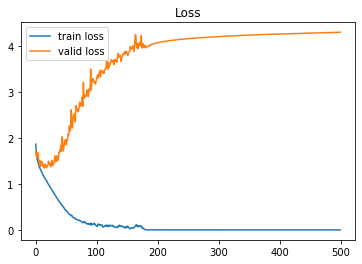

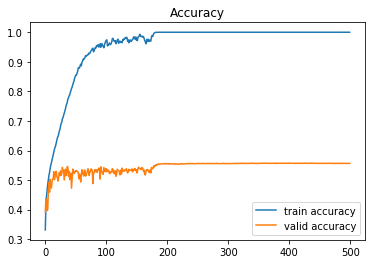

In [17]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()